In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Text(0.5, 1.0, 'Historgram of Reaction Time in Milliseconds')

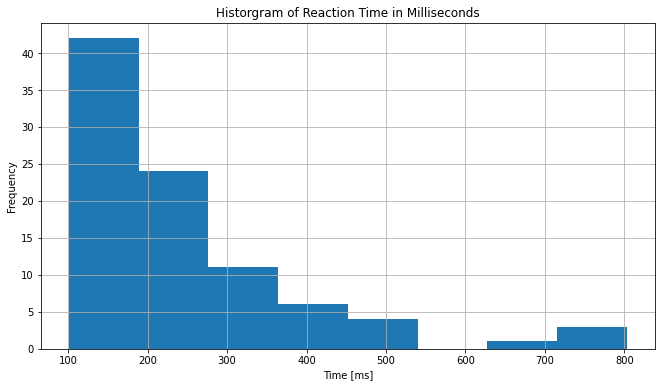

In [23]:
reaction_file = "reaction_time.txt"
reaction_data = pd.Series([float(line) for line in open(reaction_file, "r")])fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)
bins = 8
reaction_data.plot.hist(bins=bins, ax=ax, alpha=1)
ax.grid()
ax.set_xlabel("Time [ms]")
ax.set_title("Historgram of Reaction Time in Milliseconds")


Text(0.5, 1.0, 'Historgram of Thickness in Inches')

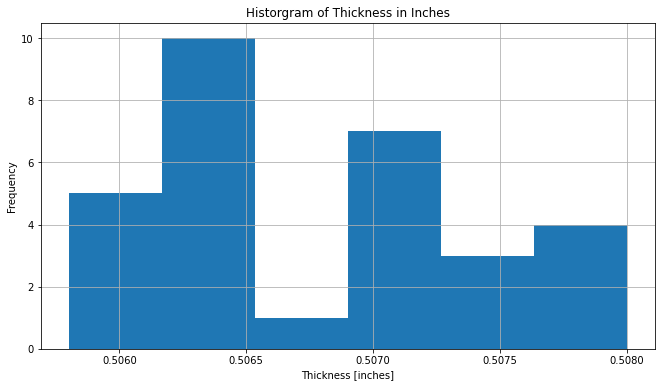

In [22]:
thickness_file = "thickness_data.txt"
thickness_data = pd.Series([float(line) for line in open(thickness_file, "r")])
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)
bins = 6
thickness_data.plot.hist(bins=bins, ax=ax, alpha=1)
ax.grid()
ax.set_xlabel("Thickness [inches]")
ax.set_title("Historgram of Thickness in Inches")


In [44]:
reaction_class_file = "reaction_class.txt"
reaction_class = pd.Series([float(line) for line in open(reaction_class_file, "r")])


In [47]:
print(f"{min(reaction_class)=}. {max(reaction_class)=}")
max(reaction_class)-min(reaction_class)
num_bins = 15
bin_width = 50
bins = [100 + bin_width*i for i in range(num_bins+1)]
print(bins)

min(reaction_class)=101.0. max(reaction_class)=803.0
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]


Text(0.5, 1.0, 'Historgram of Class Reaction Time in Milliseconds')

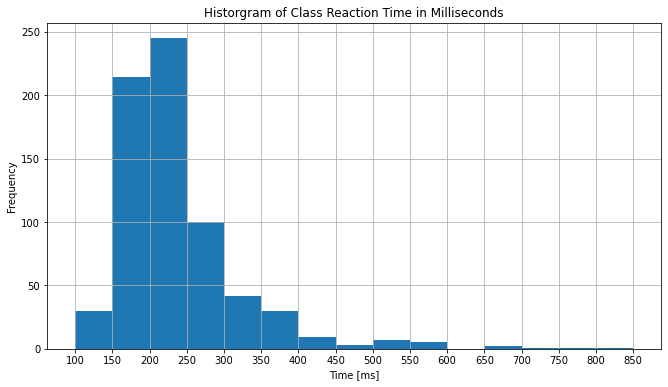

In [48]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)
reaction_class.plot.hist(bins=bins, ax=ax, alpha=1)
ax.grid()
ax.set_xticks(bins)
ax.set_xlabel("Time [ms]")
ax.set_title("Historgram of Class Reaction Time in Milliseconds")

In [219]:
print(f"mean={np.mean(reaction_class)}")
print(f"std={np.std(reaction_class)}")
np.std(reaction_class)/np.mean(reaction_class)


mean=236.79420289855074
std=85.90386248348801


0.3627785707249414

Text(0.5, 1.0, 'Historgram of Class Reaction Time in Milliseconds')

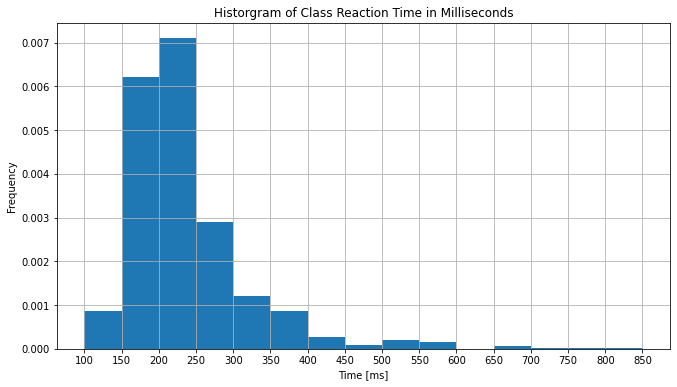

In [50]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)
reaction_class.plot.hist(bins=bins, ax=ax, alpha=1, density=True)
ax.grid()
ax.set_xticks(bins)
ax.set_xlabel("Time [ms]")
ax.set_title("Historgram of Class Reaction Time in Milliseconds")

In [190]:
thickness_class_file = "thickness_class.txt"
thickness_class = pd.Series([float(line) for line in open(thickness_class_file, "r")])
len(thickness_class)

230

In [191]:
print(f"{min(thickness_class)=}. {max(thickness_class)=}")
# num_bins = 15
# bin_width = 50
# bins = [100 + bin_width*i for i in range(num_bins+1)]
# print(bins)
bins = 12

min(thickness_class)=0.5. max(thickness_class)=0.509


In [192]:
hist, hist_bins = np.histogram(thickness_class, bins=12)

Text(0.5, 1.0, 'Historgram of Class Thickness in Inches')

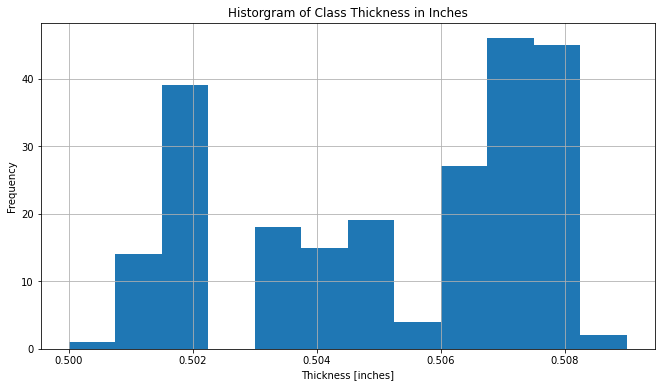

In [193]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)
thickness_class.plot.hist(bins=hist_bins, ax=ax, alpha=1)
ax.grid()
ax.set_xlabel("Thickness [inches]")
ax.set_title("Historgram of Class Thickness in Inches")

In [194]:
hist

array([ 1, 14, 39,  0, 18, 15, 19,  4, 27, 46, 45,  2], dtype=int64)

In [195]:
hist_bins

array([0.5    , 0.50075, 0.5015 , 0.50225, 0.503  , 0.50375, 0.5045 ,
       0.50525, 0.506  , 0.50675, 0.5075 , 0.50825, 0.509  ])

In [196]:
x_mid = [(hist_bins[i]+hist_bins[i+1])/2 for i in range(len(hist_bins)-1)]
bin_width = (hist_bins[1]-hist_bins[0])
bin_width

0.0007500000000000284

In [197]:
prob = hist/np.sum(hist)
fx = prob/bin_width

Text(0.5, 1.0, 'Estimate of f(x) vs x of Class Thickness in Inches')

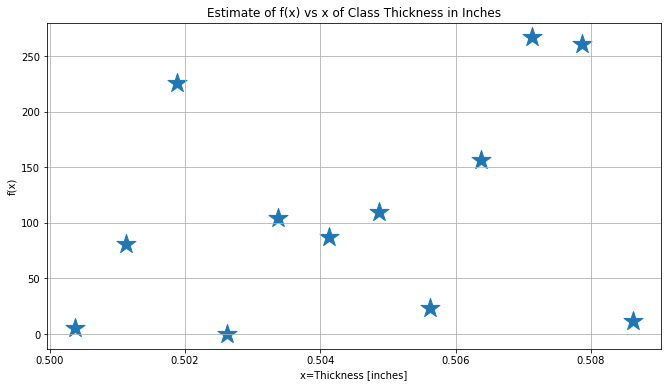

In [208]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_mid, fx, s=400, marker='*')
ax.grid()
ax.set_ylabel("f(x)")
ax.set_xlabel("x=Thickness [inches]")
ax.set_title("Estimate of f(x) vs x of Class Thickness in Inches")

In [199]:
mean = np.mean(thickness_class)
std = np.std(thickness_class)
z_mid = (x_mid-mean)/std

In [200]:
fake_z = np.linspace(np.min(z_mid)*2, np.max(z_mid)*2, 100)
normal_fake_z = np.exp(-0.5*fake_z**2)/np.sqrt(2*np.pi)

Text(0.5, 1.0, 'Estimate of PDF of Class Thickness in Inches')

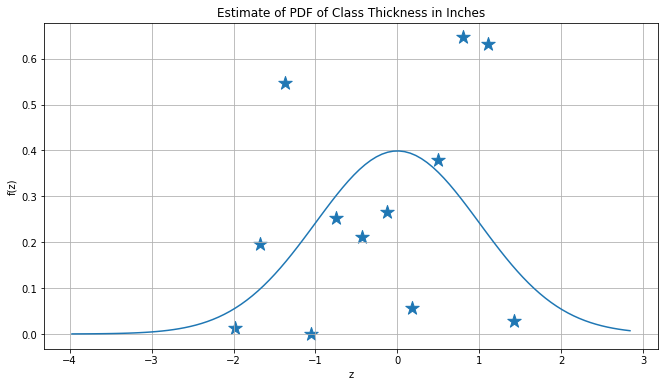

In [212]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(z_mid, std*fx, s=200, marker='*')
ax.plot(fake_z, normal_fake_z)
ax.grid()
ax.set_xlabel("z")
ax.set_ylabel("f(z)")
ax.set_title("Estimate of PDF of Class Thickness in Inches")

In [220]:
print(f"mean={np.mean(thickness_class):.4f}")
print(f"median={np.median(thickness_class):.4f}")
print(f"mode={stats.mode(thickness_class).mode[0]:.4f}")
print(f"std={np.std(thickness_class):.8f}")
conf_low = -1.96*std + mean
conf_high = 1.96*std + mean
print(f"We are 95% confident that the population parameter is between {conf_low:.4f} in and {conf_high:.4f} in.")

mean=0.5052
median=0.5060
mode=0.5020
std=0.00242334
We are 95% confident that the population parameter is between 0.5004 in and 0.5099 in.
